In [57]:
%%python3
# -*- coding: utf-8 -*-

import os
import json
import time
import util
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer as TFIDF

law and accusation files loaded.


Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.815 seconds.
Prefix dict has been built succesfully.


In [59]:
%%python3
DIM = 3000

In [58]:
%matplotlib inline

In [60]:
%%python3
def train_tfidf(facts):
    tfidf = TFIDF(min_df=5, max_features=DIM, ngram_range=(1, 3))
    tfidf.fit(facts)

In [61]:
%%python3
def cut_all(facts):
    facts = pd.Series(facts)
    return facts.apply(util.cut_line)

In [62]:
%%python3
def dump_processed_data_to_file(facts, accu_label, article_label, imprison_label):
    """ dump processed data to `.pkl` file """
    data = [facts, accu_label, article_label, imprison_label]
    with open("./mid-data.pkl", "wb") as f:
        pickle.dump(data, f)

In [63]:
%%python3
def load_data(fname):
    """ load data from local file """
    facts = []

    accu_label = []
    article_label = []
    imprison_label = []

    with open(fname, 'r') as f:
        line = f.readline()
        while line:
            line_dict = json.loads(line, encoding="utf-8")

            fact = line_dict["fact"]

            accu = util.get_label(line_dict, "accu")
            article = util.get_label(line_dict, "law")
            imprison = util.get_label(line_dict, "time")

            facts.append(fact)

            accu_label.append(accu)
            article_label.append(article)
            imprison_label.append(imprison)

            line = f.readline()
    if util.DEBUG:
        print("training file loaded.")

    facts = cut_all(facts)

    if util.DEBUG:
        print("training data segmented.")

    accu_label = pd.Series(accu_label)
    article_label = pd.Series(article_label)
    imprison_label = pd.Series(imprison_label)

    if util.DUMP:
        dump_processed_data_to_file(facts, accu_label, article_label, imprison_label)

    return facts, accu_label, article_label, imprison_label

In [64]:
%%python3
train_loc = os.path.join(util.DATA_DIR, util.TRAIN_FNAME)
start = time.time()
facts, accu_label, article_label, imprison_label = load_data(train_loc)
print("duration = {}".format(time.time() - start))

Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
NameError: name 'os' is not defined


In [45]:
facts.head(10)

0    昌宁县 人民检察院 指控 ， 2014 年 4 月 19 日 下午 16 时许 ， 被告人 ...
1    公诉机关 指控 , 2015 年 11 月 10 日晚 9 时许 ， 被告人 李某 的 妹妹...
2    贵州省 平坝县 人民检察院 指控 ： 2014 年 4 月 9 日 下午 ， 被告人 王某 ...
3    经 审理 查明 ： 2014 年 5 月 6 日 14 时许 ， 被告人 叶 某某 驾车 途...
4    安阳县 人民检察院 指控 ： 2014 年 4 月 27 日 上午 11 时许 ， 宋某 甲...
5    富平县 人民检察院 指控 ， 2016 年 6 月 11 日 18 时许 ， 在 富平县 某...
6    深圳市 龙岗区 人民检察院 指控 ， 2014 年 5 月 16 日 22 时许 ， 被害人...
7    经 审理 查明 ， 2011 年 8 月 25 日 凌晨 2 时 50 分许 ， 被告人 许...
8    岳阳市 岳阳楼区 人民检察院 指控 ： 2015 年 8 月 5 日 凌晨 1 时许 ， 被...
9    垣曲县 人民检察院 指控 ： 2016 年 5 月 10 日 3 时 15 分 ， 被告人张...
dtype: object

In [53]:
?%time

In [13]:
imprison_label.describe()

count    154592.000000
mean         26.154077
std          33.584980
min          -2.000000
25%           6.000000
50%          12.000000
75%          36.000000
max         300.000000
dtype: float64

In [42]:
accu_label.value_counts().describe()

count     195.000000
mean      792.779487
std      1065.146773
min         1.000000
25%        55.000000
50%       253.000000
75%      1577.000000
max      7243.000000
dtype: float64

In [44]:
article_label.value_counts().describe()

count     182.000000
mean      849.406593
std      1082.087368
min         3.000000
25%        68.000000
50%       247.500000
75%      1732.750000
max      5603.000000
dtype: float64

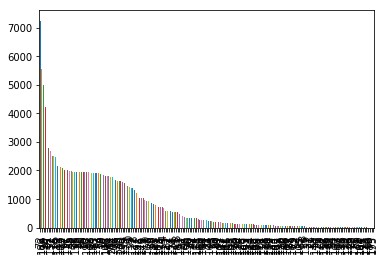

In [40]:
accu_label.value_counts().plot.bar()

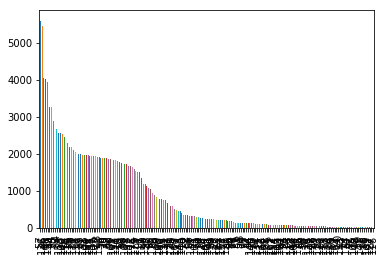

In [41]:
article_label.value_counts().plot.bar()